In [1]:
from pickle_reader import *
from prepare import *
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
robot_dictionary = read_pickles_in_directory('pickle-files')

In [3]:
stats_df = create_long_format_stats_df(robot_dictionary)

In [4]:
match_history_df = create_long_format_matchup_history_df(robot_dictionary)

In [5]:
df = merge_matchup_history(stats_df, match_history_df)

In [6]:
robot_name_list = list(df['RobotName'].unique())

In [7]:
robot_name_list[5]

'rotator-2019'

In [8]:
df[df['RobotName'] == robot_name_list[5]].head(45)

,RobotName,Year,Value,Stats
740,rotator-2019,Career,29,Total matches
741,rotator-2019,Career,55%,Win percentage
742,rotator-2019,Career,16,Total wins
743,rotator-2019,Career,13,Losses
744,rotator-2019,Career,9,Knockouts
745,rotator-2019,Career,31%,KO percentage
746,rotator-2019,Career,109 s,Average knockout time
747,rotator-2019,Career,5,Knockouts against
748,rotator-2019,Career,17%,KO against percentage
749,rotator-2019,Career,11,Judges decision wins


In [9]:
df.isnull().sum()

RobotName    0
Year         0
Value        0
Stats        0
dtype: int64

In [10]:
mask_percent = df['Value'].str.endswith('%').fillna(False).astype(bool)

In [11]:
# Check if the Value column contains the percent symbol, if so, remove it and convert to float
df.loc[mask_percent, 'Value'] = df[mask_percent]['Value'].str.rstrip('%').astype(float)/100

In [13]:
df[df['RobotName'] == robot_name_list[5]].head(45)

,RobotName,Year,Value,Stats
740,rotator-2019,Career,29,Total matches
741,rotator-2019,Career,0.55,Win percentage
742,rotator-2019,Career,16,Total wins
743,rotator-2019,Career,13,Losses
744,rotator-2019,Career,9,Knockouts
745,rotator-2019,Career,0.31,KO percentage
746,rotator-2019,Career,109 s,Average knockout time
747,rotator-2019,Career,5,Knockouts against
748,rotator-2019,Career,0.17,KO against percentage
749,rotator-2019,Career,11,Judges decision wins


In [14]:
mask_seconds = df['Value'].str.match(r'^\d+ s$').fillna(False).astype(bool)

In [15]:
# Check if the Value column contains an "s", if so, remove it and convert to float
df.loc[mask_seconds, 'Value'] = df[mask_seconds]['Value'].str.rstrip('s').astype(float)

In [16]:
df[df['RobotName'] == robot_name_list[5]].head(45)

,RobotName,Year,Value,Stats
740,rotator-2019,Career,29,Total matches
741,rotator-2019,Career,0.55,Win percentage
742,rotator-2019,Career,16,Total wins
743,rotator-2019,Career,13,Losses
744,rotator-2019,Career,9,Knockouts
745,rotator-2019,Career,0.31,KO percentage
746,rotator-2019,Career,109.0,Average knockout time
747,rotator-2019,Career,5,Knockouts against
748,rotator-2019,Career,0.17,KO against percentage
749,rotator-2019,Career,11,Judges decision wins


In [17]:
df['Stats'].unique()

array(['Total matches', 'Win percentage', 'Total wins', 'Losses',
       'Knockouts', 'KO percentage', 'Average knockout time',
       'Knockouts against', 'KO against percentage',
       'Judges decision wins'], dtype=object)

In [18]:
# Rename the "Average knockout time" column to "Average knockout time second"
df.loc[df['Stats'] == 'Average knockout time', 'Stats'] = 'Average knockout time (seconds)'

In [19]:
df[df['RobotName'] == robot_name_list[5]].head(45)

,RobotName,Year,Value,Stats
740,rotator-2019,Career,29,Total matches
741,rotator-2019,Career,0.55,Win percentage
742,rotator-2019,Career,16,Total wins
743,rotator-2019,Career,13,Losses
744,rotator-2019,Career,9,Knockouts
745,rotator-2019,Career,0.31,KO percentage
746,rotator-2019,Career,109.0,Average knockout time (seconds)
747,rotator-2019,Career,5,Knockouts against
748,rotator-2019,Career,0.17,KO against percentage
749,rotator-2019,Career,11,Judges decision wins


In [21]:
df.dtypes

RobotName    object
Year         object
Value        object
Stats        object
dtype: object

In [26]:
df['Value'].unique()

array(['35', 0.71, '25', '10', '20', 0.57, 84.0, '8', 0.23, '5', 0.4, '2',
       '3', '0', 0.0, 0.6, '6', 0.5, 113.0, 0.33, '7', '4', 71.0, 0.29,
       '1', 0.83, 104.0, 0.17, 1.0, 0.67, 55.0, 0.8, 78.0, '19', 0.58,
       '11', '9', 0.47, 82.0, 0.26, 106.0, 0.75, 92.0, 0.25, 48.0, 0.2,
       'Episode 705', 'Doomba vs Double Tap', 'Double Tap by KO 55s',
       '16', 0.31, 0.19, 89.0, 121.0, 'Episode 601', 'Episode 605',
       'Episode 608', 'SCSF 3', 'Free Shipping vs Blacksmith',
       'Free Shipping vs Upper Cut', 'Free Shipping vs Tombstone',
       'Icewave vs Free Shipping', 'Blacksmith by JD',
       'Upper Cut by KO 1m58s', 'Tombstone by JD', 'Upper Cut by KO 32s',
       'Free Shipping by JD', 146.0, '29', 0.55, '13', 109.0, 169.0, 76.0,
       0.44, 114.0, 118.0, 67.0, 'Qualifiers Session 1',
       'Sunday Exhibition', 'Rotator vs Witch Doctor',
       "Whiplash vs The Disk o' Inferno vs Rotator",
       'Witch Doctor by KO 42s', 'Rotator by JD', 0.22, 117.0, 149.0,
   

In [22]:
df_years = df[df['Year'] != 'Career']

In [27]:
# Convert the 'Value' column to a numeric data type
df_years['Value'] = pd.to_numeric(df_years['Value'], errors='coerce')

# Drop rows containing NaN values in the 'Value' column
df_years = df_years.dropna(subset=['Value'])

# Reset the index of the filtered dataframe
df_years.reset_index(drop=True, inplace=True)

/var/folders/kx/y9k75c0504q4cdb8ztj47k840000gn/T/ipykernel_78948/434552771.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_years['Value'] = pd.to_numeric(df_years['Value'], errors='coerce')


In [28]:
df_years['Year'].unique()

array(['2021', '2020', '2019', '2018', '2016', '2015', 'WCVII',
       'Season 2', 'Season 1'], dtype=object)

In [31]:
df_years['Stats'].unique()

array(['Total matches', 'Win percentage', 'Total wins', 'Losses',
       'Knockouts', 'KO percentage', 'Average knockout time (seconds)',
       'Knockouts against', 'KO against percentage',
       'Judges decision wins'], dtype=object)

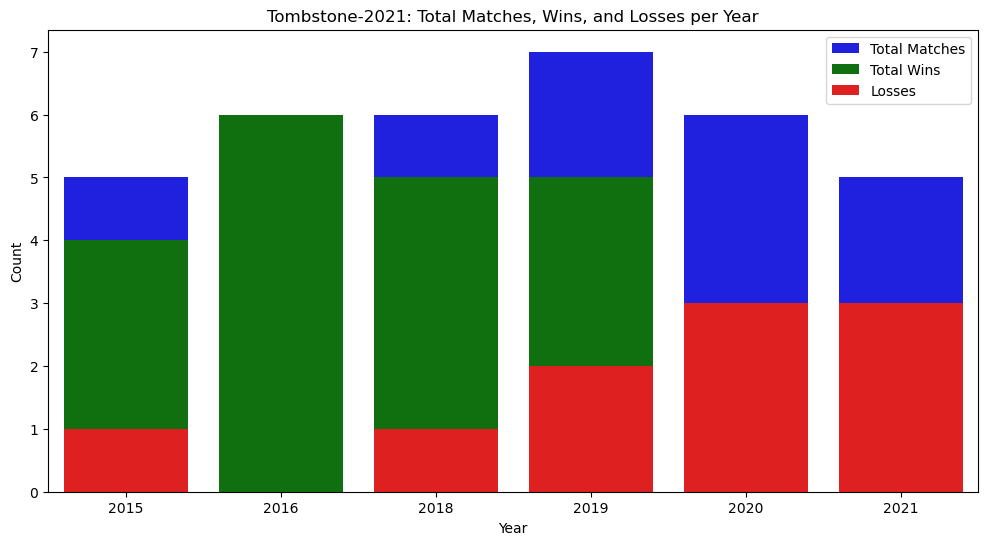

In [32]:
# Assuming your DataFrame is named df
filtered_df = df_years[(df_years['RobotName'] == 'tombstone-2021') & (df_years['Stats'].isin(['Total matches', 'Total wins', 'Losses']))]

# Pivot the DataFrame to make it suitable for a bar chart
pivoted_df = filtered_df.pivot_table(index='Year', columns='Stats', values='Value', aggfunc='first').reset_index()

# Create the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Year', y='Total matches', data=pivoted_df, color='blue', label='Total Matches')
sns.barplot(x='Year', y='Total wins', data=pivoted_df, color='green', label='Total Wins')
sns.barplot(x='Year', y='Losses', data=pivoted_df, color='red', label='Losses')

# Set labels and legend
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Tombstone-2021: Total Matches, Wins, and Losses per Year')
plt.legend()

plt.show()

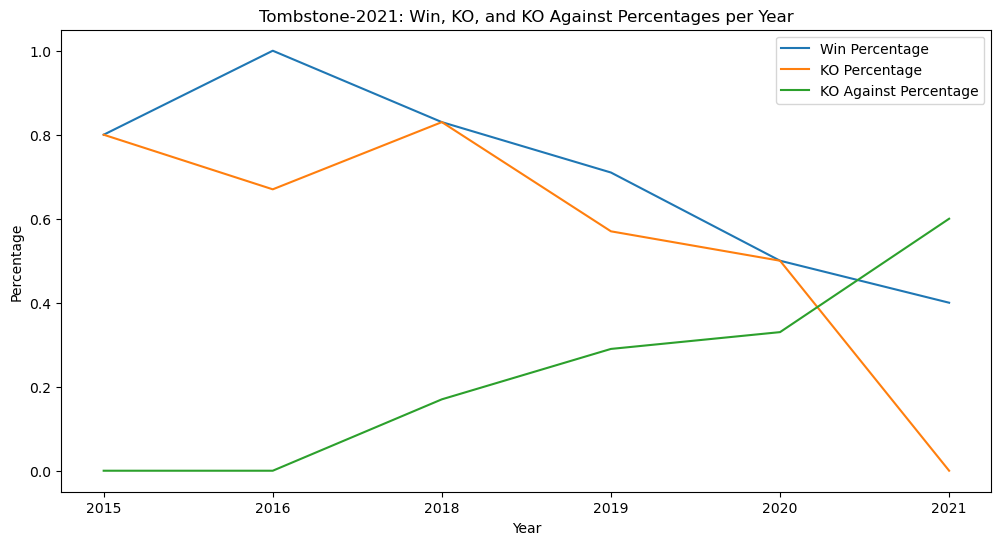

In [33]:
# Filter the DataFrame
percentage_df = df_years[(df_years['RobotName'] == 'tombstone-2021') & (df_years['Stats'].isin(['Win percentage', 'KO percentage', 'KO against percentage']))]

# Pivot the DataFrame
pivoted_percentage_df = percentage_df.pivot_table(index='Year', columns='Stats', values='Value', aggfunc='first').reset_index()

# Create the line chart
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Win percentage', data=pivoted_percentage_df, label='Win Percentage')
sns.lineplot(x='Year', y='KO percentage', data=pivoted_percentage_df, label='KO Percentage')
sns.lineplot(x='Year', y='KO against percentage', data=pivoted_percentage_df, label='KO Against Percentage')

# Set labels and legend
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Tombstone-2021: Win, KO, and KO Against Percentages per Year')
plt.legend()

plt.show()

In [ ]:
def clean_merged_robot_data(df):
    # mas
    mask_percent = df['Value'].str.endswith('%').fillna(False).astype(bool)
    
    # Check if the Value column contains the percent symbol, if so, remove it and convert to float
    df.loc[mask_percent, 'Value'] = df[mask_percent]['Value'].str.rstrip('%').astype(float)/100
    
    # 
    mask_seconds = df['Value'].str.match(r'^\d+ s$').fillna(False).astype(bool)
    
    # Check if the Value column contains an "s", if so, remove it and convert to float
    df.loc[mask_seconds, 'Value'] = df[mask_seconds]['Value'].str.rstrip('s').astype(float)
    
    # Rename the "Average knockout time" column to "Average knockout time second"
    df.loc[df['Stats'] == 'Average knockout time', 'Stats'] = 'Average knockout time (seconds)'
    
    return df